<a href="https://colab.research.google.com/github/Krishna-Dhawangale/Machine-Learning-Practical/blob/main/ML_CS23032_Lab8_Extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Krishna Dhawangale Assignment 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/ML_Data/Breast_Cancer_dataset - Breast_Cancer_dataset.csv"
df=pd.read_csv(path)
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [4]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_wo

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the feature data (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Encoded target (y) head:")
print(y[:5])
print("\nScaled features (X_scaled) head:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Encoded target (y) head:
[1 1 1 1 1]

Scaled features (X_scaled) head:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_

In [6]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Determine number of components for 95% variance
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components_pca = np.where(explained_variance_ratio_cumsum >= 0.95)[0][0] + 1

print(f"Number of PCA components to explain 95% variance: {n_components_pca}")

# Transform data with selected number of components
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X_scaled)

print("\nShape of X_pca:", X_pca.shape)
print("First 5 rows of X_pca:\n", X_pca[:5])

Number of PCA components to explain 95% variance: 10

Shape of X_pca: (569, 10)
First 5 rows of X_pca:
 [[ 9.19283683  1.94858307 -1.12316616 -3.6337309   1.19511012  1.41142445
   2.15936987 -0.39840723 -0.15711836 -0.87740188]
 [ 2.3878018  -3.76817174 -0.52929269 -1.11826386 -0.62177498  0.02865635
   0.01335809  0.24098846 -0.71190482  1.10699494]
 [ 5.73389628 -1.0751738  -0.55174759 -0.91208267  0.1770859   0.54145215
  -0.66816648  0.09737374  0.02406564  0.4542754 ]
 [ 7.1229532  10.27558912 -3.23278955 -0.15254703  2.9608784   3.05342182
   1.4299107   1.05956524 -1.40543967 -1.11697527]
 [ 3.93530207 -1.94807157  1.38976673 -2.94063935 -0.5467474  -1.22649464
  -0.93621255  0.63637606 -0.26380546  0.37770447]]


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Determine number of components for LDA (n_classes - 1)
n_classes = len(np.unique(y)) # np.unique(y) returns array([0, 1])
n_components_lda = n_classes - 1

print(f"Number of LDA components (n_classes - 1): {n_components_lda}")

# Apply LDA
lda = LDA(n_components=n_components_lda)
X_lda = lda.fit_transform(X_scaled, y)

print("\nShape of X_lda:", X_lda.shape)
print("First 5 rows of X_lda:\n", X_lda[:5])

Number of LDA components (n_classes - 1): 1

Shape of X_lda: (569, 1)
First 5 rows of X_lda:
 [[3.32392717]
 [2.31910801]
 [3.74742484]
 [4.04854946]
 [2.28115767]]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Initialize and train a Logistic Regression model on PCA-transformed data
logistic_pca = LogisticRegression(max_iter=2000, random_state=42)
logistic_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = logistic_pca.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca)

print(f"\nAccuracy with PCA-transformed data: {accuracy_pca:.4f}")
print("\nClassification Report with PCA-transformed data:\n", report_pca)

Shape of X_train_pca: (398, 10)
Shape of X_test_pca: (171, 10)
Shape of y_train: (398,)
Shape of y_test: (171,)

Accuracy with PCA-transformed data: 0.9825

Classification Report with PCA-transformed data:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the LDA-transformed data into training and testing sets
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

print("Shape of X_train_lda:", X_train_lda.shape)
print("Shape of X_test_lda:", X_test_lda.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Initialize and train a Logistic Regression model on LDA-transformed data
logistic_lda = LogisticRegression(max_iter=2000, random_state=42)
logistic_lda.fit(X_train_lda, y_train)

# Make predictions on the test set
y_pred_lda = logistic_lda.predict(X_test_lda)

# Evaluate the model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
report_lda = classification_report(y_test, y_pred_lda)

print(f"\nAccuracy with LDA-transformed data: {accuracy_lda:.4f}")
print("\nClassification Report with LDA-transformed data:\n", report_lda)

Shape of X_train_lda: (398, 1)
Shape of X_test_lda: (171, 1)
Shape of y_train: (398,)
Shape of y_test: (171,)

Accuracy with LDA-transformed data: 0.9883

Classification Report with LDA-transformed data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [10]:
print(f"Accuracy with PCA-transformed data: {accuracy_pca:.4f}")
print(f"Accuracy with LDA-transformed data: {accuracy_lda:.4f}")

if accuracy_pca > accuracy_lda:
    print("\nPCA-transformed data yielded slightly better accuracy.")
elif accuracy_lda > accuracy_pca:
    print("\nLDA-transformed data yielded slightly better accuracy.")
else:
    print("\nBoth PCA and LDA-transformed data yielded the same accuracy.")

Accuracy with PCA-transformed data: 0.9825
Accuracy with LDA-transformed data: 0.9883

LDA-transformed data yielded slightly better accuracy.


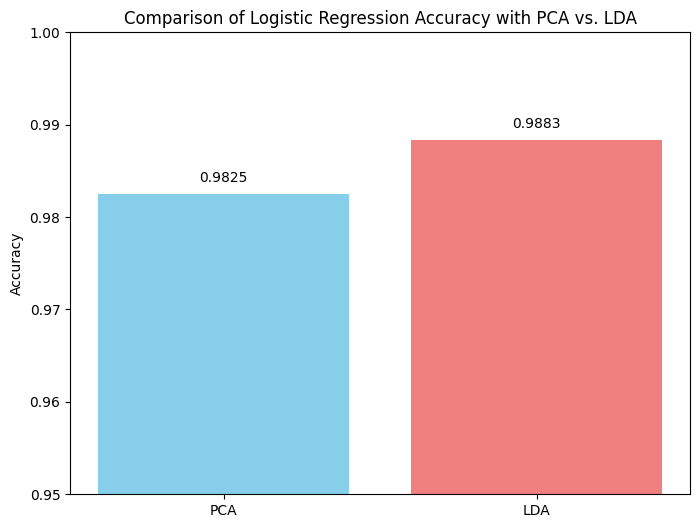

In [11]:
import matplotlib.pyplot as plt

# Prepare data for visualization
algorithms = ['PCA', 'LDA']
accuracies = [accuracy_pca, accuracy_lda]

# Create a bar chart for comparison
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0.95, 1.0) # Set y-axis limits to better show differences
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression Accuracy with PCA vs. LDA')

# Add accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()
